In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from statsmodels.tsa.tsatools import detrend
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from numpy.random import randn
from numpy import arange
from statsmodels.tsa.tsatools import lagmat
from numpy import corrcoef
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
f1=pd.read_csv(r'data2.csv')
f=pd.read_csv(r'data1.csv')

In [ ]:
f.YEAR=f.YEAR.astype('str')
f.MO=f.MO.astype('str')
f.DY=f.DY.astype('str')
f['date']=f.YEAR+'/'+f.MO+'/'+f.DY
f.date=pd.to_datetime(f.date)

In [ ]:
f1.YEAR=f1.YEAR.astype('str')
f1.MO=f1.MO.astype('str')
f1.DY=f1.DY.astype('str')
f1['date']=f1.YEAR+'/'+f1.MO+'/'+f1.DY
f1.date=pd.to_datetime(f1.date)

In [ ]:
f.merge(f1,how='left',left_on='date',right_on='date')

df=f.merge(f1,how='left',left_on='date',right_on='date')

#df.isna().sum()
df.to_csv(r'\new.csv')

data=df.drop(columns=['LAT_y', 'LON_y', 'YEAR_y', 'MO_y', 'DY_y'], axis=1)


In [ ]:
data

,LAT_x,LON_x,YEAR_x,MO_x,DY_x,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,...,WS10M_RANGE,WS50M_MIN,WS10M_MIN,WS50M_MAX,WS10M_MAX,WS50M,WS10M,KT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN
0,36.78551,10.15781,1989,1,1,0.40,6.43,72.48,101.87,5.64,...,2.28,3.40,2.45,6.48,4.73,5.47,3.78,0.23,3.05,1.04
1,36.78551,10.15781,1989,1,2,0.19,6.53,78.22,101.87,6.43,...,3.03,3.44,2.49,6.52,5.52,4.96,3.63,0.42,2.33,1.89
2,36.78551,10.15781,1989,1,3,0.33,6.21,74.63,102.18,5.74,...,1.17,2.20,2.06,4.64,3.23,3.64,2.68,0.50,3.03,2.26
3,36.78551,10.15781,1989,1,4,0.12,6.59,81.43,102.42,4.44,...,1.66,1.09,0.89,3.50,2.55,2.06,1.56,0.24,3.08,1.08
4,36.78551,10.15781,1989,1,5,0.43,6.16,80.64,102.12,5.54,...,4.14,0.32,0.17,5.56,4.31,3.52,2.66,0.33,2.96,1.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,36.78551,10.15781,2020,2,26,0.10,7.33,74.54,100.45,7.90,...,4.75,6.39,3.51,10.09,8.26,8.38,5.83,0.56,-999.00,3.91
11379,36.78551,10.15781,2020,2,27,0.03,6.18,67.61,100.96,8.14,...,4.57,2.70,1.91,9.12,6.47,6.74,4.96,0.52,-999.00,3.63
11380,36.78551,10.15781,2020,2,28,0.00,6.85,71.36,101.04,11.03,...,4.06,5.61,3.64,9.49,7.70,8.21,5.69,0.68,4.85,4.79
11381,36.78551,10.15781,2020,2,29,0.01,6.92,64.74,100.80,15.41,...,6.01,1.43,0.87,8.36,6.88,4.45,3.33,0.68,-999.00,4.87


In [ ]:
data.describe()

,LAT_x,LON_x,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,TS,T2MDEW,T2MWET,...,WS10M_RANGE,WS50M_MIN,WS10M_MIN,WS50M_MAX,WS10M_MAX,WS50M,WS10M,KT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN
count,1.138300e+04,1.138300e+04,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,...,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000
mean,3.678551e+01,1.015781e+01,1.330196,9.264688,67.696669,100.664354,9.151458,19.391977,12.209114,12.200118,...,4.030816,3.635778,2.533267,8.509774,6.563993,6.187936,4.633853,-0.233276,-236.820155,4.096391
std,2.344894e-12,1.101390e-12,3.614359,2.682799,11.065301,0.569130,3.010171,6.666902,4.424820,4.417321,...,1.632364,2.589446,1.754786,2.862493,2.455033,2.597977,2.016453,28.096551,429.885368,24.973868
min,3.678551e+01,1.015781e+01,0.000000,3.780000,25.220000,97.940000,1.220000,6.110000,-0.270000,-0.210000,...,0.700000,0.010000,0.010000,2.580000,1.700000,1.200000,0.890000,-999.000000,-999.000000,-999.000000
25%,3.678551e+01,1.015781e+01,0.000000,7.000000,59.940000,100.350000,6.920000,13.420000,8.670000,8.655000,...,2.890000,1.480000,1.140000,6.410000,4.730000,4.180000,3.090000,0.490000,2.585000,2.850000
50%,3.678551e+01,1.015781e+01,0.080000,8.900000,68.540000,100.630000,9.070000,18.390000,12.200000,12.190000,...,3.780000,3.070000,2.240000,8.040000,6.100000,5.740000,4.220000,0.590000,4.520000,4.540000
75%,3.678551e+01,1.015781e+01,0.950000,11.450000,75.960000,100.970000,11.340000,25.275000,15.940000,15.930000,...,4.875000,5.410000,3.570000,10.030000,7.940000,7.790000,5.790000,0.660000,6.940000,6.680000
max,3.678551e+01,1.015781e+01,50.900000,17.130000,96.700000,102.970000,19.600000,34.920000,22.530000,22.530000,...,15.820000,16.690000,12.850000,24.200000,19.630000,20.340000,16.110000,0.790000,8.820000,8.780000


In [ ]:
data.dtypes


LAT_x                       float64
LON_x                       float64
YEAR_x                       object
MO_x                         object
DY_x                         object
PRECTOT                     float64
QV2M                        float64
RH2M                        float64
PS                          float64
T2M_RANGE                   float64
TS                          float64
T2MDEW                      float64
T2MWET                      float64
T2M_MAX                     float64
T2M_MIN                     float64
T2M                         float64
date                 datetime64[ns]
WS50M_RANGE                 float64
WS10M_RANGE                 float64
WS50M_MIN                   float64
WS10M_MIN                   float64
WS50M_MAX                   float64
WS10M_MAX                   float64
WS50M                       float64
WS10M                       float64
KT                          float64
CLRSKY_SFC_SW_DWN           float64
ALLSKY_SFC_SW_DWN           

In [ ]:
data=data.set_index('date')

In [ ]:
data.isnull().any()

LAT_x                False
LON_x                False
YEAR_x               False
MO_x                 False
DY_x                 False
PRECTOT              False
QV2M                 False
RH2M                 False
PS                   False
T2M_RANGE            False
TS                   False
T2MDEW               False
T2MWET               False
T2M_MAX              False
T2M_MIN              False
T2M                  False
WS50M_RANGE          False
WS10M_RANGE          False
WS50M_MIN            False
WS10M_MIN            False
WS50M_MAX            False
WS10M_MAX            False
WS50M                False
WS10M                False
KT                   False
CLRSKY_SFC_SW_DWN    False
ALLSKY_SFC_SW_DWN    False
dtype: bool

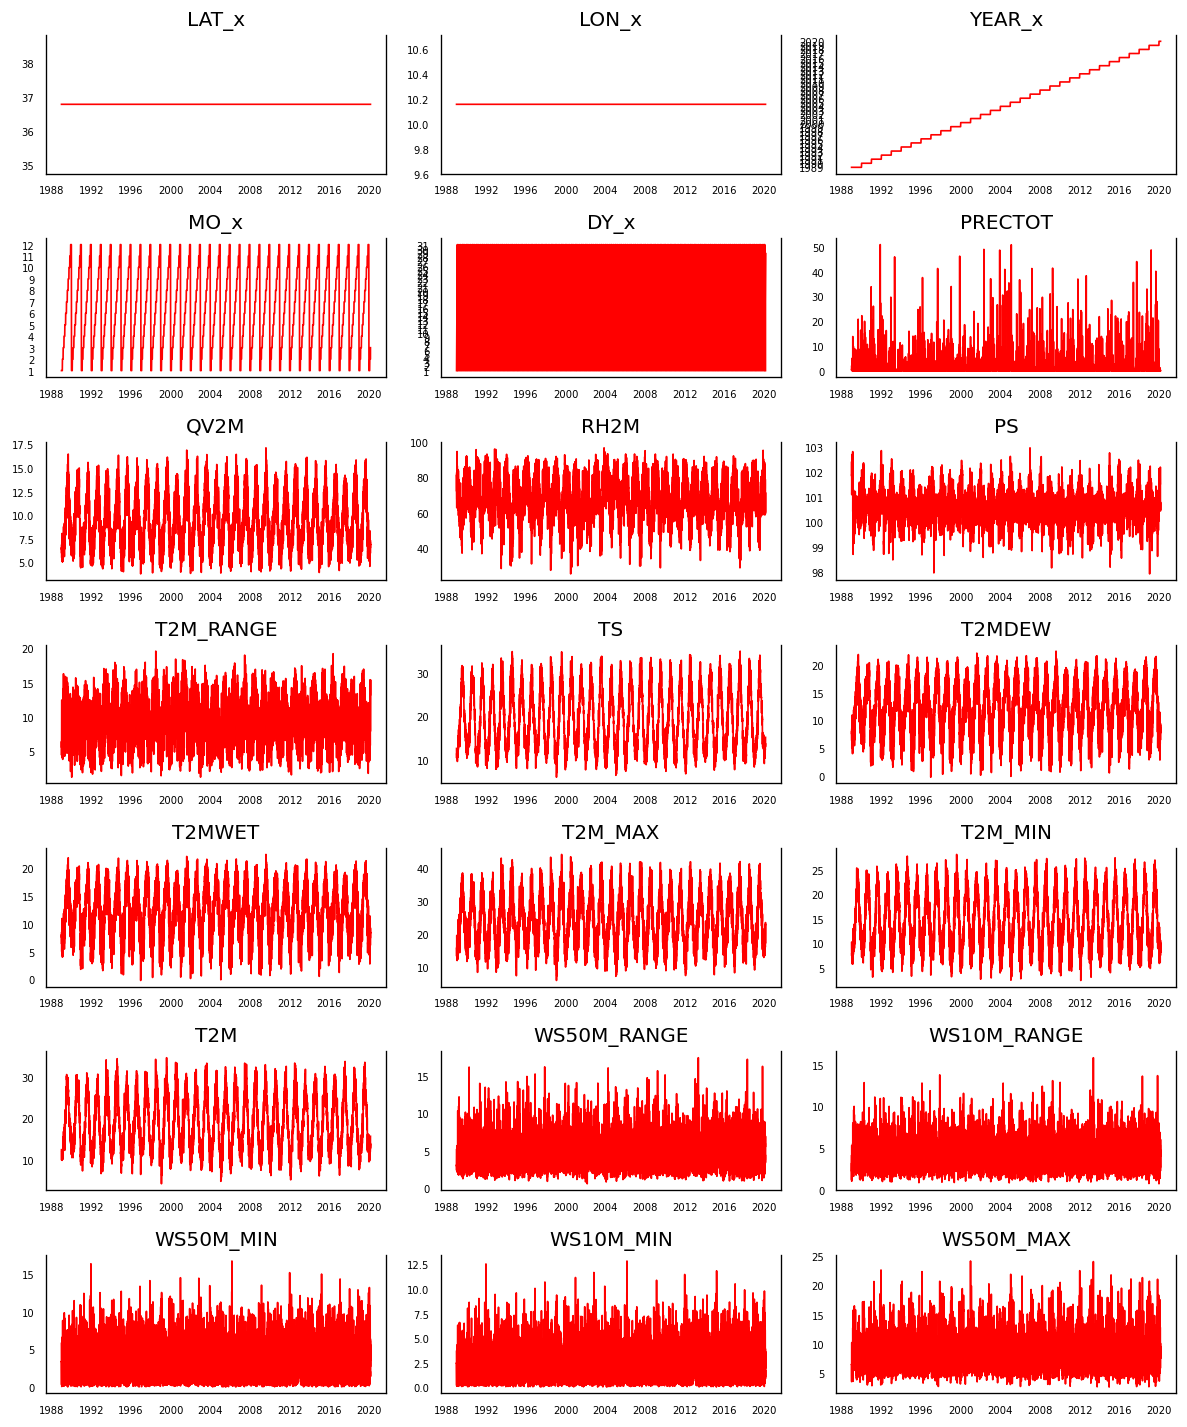

In [ ]:
data.tail()
fig, axes = plt.subplots(nrows=7, ncols=3, dpi=120, figsize=(10,12))
for i, ax in enumerate(axes.flatten()):
    data1 = data[data.columns[i]]
    ax.plot(data1, color='red', linewidth=1)
    # Decorations
    ax.set_title(data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [ ]:
data_comp = data.asfreq('d')
data_comp.head()

,LAT_x,LON_x,YEAR_x,MO_x,DY_x,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,...,WS10M_RANGE,WS50M_MIN,WS10M_MIN,WS50M_MAX,WS10M_MAX,WS50M,WS10M,KT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN
date,,,,,,,,,,,,,,,,,,,,,
1989-01-01,36.78551,10.15781,1989,1,1,0.40,6.43,72.48,101.87,5.64,...,2.28,3.40,2.45,6.48,4.73,5.47,3.78,0.23,3.05,1.04
1989-01-02,36.78551,10.15781,1989,1,2,0.19,6.53,78.22,101.87,6.43,...,3.03,3.44,2.49,6.52,5.52,4.96,3.63,0.42,2.33,1.89
1989-01-03,36.78551,10.15781,1989,1,3,0.33,6.21,74.63,102.18,5.74,...,1.17,2.20,2.06,4.64,3.23,3.64,2.68,0.50,3.03,2.26
1989-01-04,36.78551,10.15781,1989,1,4,0.12,6.59,81.43,102.42,4.44,...,1.66,1.09,0.89,3.50,2.55,2.06,1.56,0.24,3.08,1.08
1989-01-05,36.78551,10.15781,1989,1,5,0.43,6.16,80.64,102.12,5.54,...,4.14,0.32,0.17,5.56,4.31,3.52,2.66,0.33,2.96,1.51


In [ ]:
data_comp.isnull().any()

LAT_x                False
LON_x                False
YEAR_x               False
MO_x                 False
DY_x                 False
PRECTOT              False
QV2M                 False
RH2M                 False
PS                   False
T2M_RANGE            False
TS                   False
T2MDEW               False
T2MWET               False
T2M_MAX              False
T2M_MIN              False
T2M                  False
WS50M_RANGE          False
WS10M_RANGE          False
WS50M_MIN            False
WS10M_MIN            False
WS50M_MAX            False
WS10M_MAX            False
WS50M                False
WS10M                False
KT                   False
CLRSKY_SFC_SW_DWN    False
ALLSKY_SFC_SW_DWN    False
dtype: bool

In [ ]:
data.columns
data=data.reset_index()

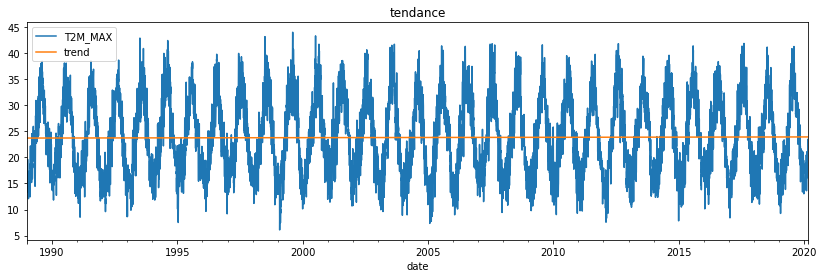

In [ ]:
notrend = detrend(data.T2M_MAX, order=1)
data["notrend"] = notrend
data["trend"] = data['T2M_MAX'] - notrend
ax = data.plot(x="date", y=["T2M_MAX", "trend"], figsize=(14,4))
ax.set_title('tendance');

In [ ]:
cor = acf(data.T2M_MAX,nlags=11383)
cor

C:\Users\imen\anaconda3i\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.00000000e+00, 9.44914417e-01, 8.99072647e-01, ...,
       6.72224336e-05, 1.63074506e-05, 1.17249452e-05])

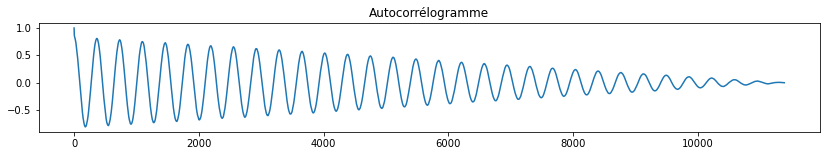

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(14,2))
ax.plot(cor)
ax.set_title("Autocorrélogramme");

Observations: 5693
Training Observations: 2848
Testing Observations: 2845
Observations: 8538
Training Observations: 5693
Testing Observations: 2845
Observations: 11383
Training Observations: 8538
Testing Observations: 2845


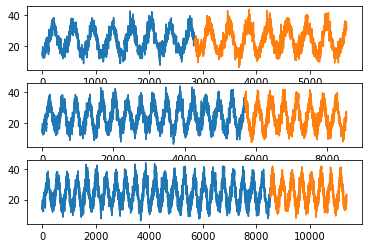

In [ ]:
X = data.T2M_MAX
splits = TimeSeriesSplit(n_splits=3)
plt.figure(1)
index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    plt.subplot(310 + index)
    plt.plot(train)
    plt.plot([None for i in train] + [x for x in test])
    index += 1
plt.show()



<ipython-input-40-8965be5709c8>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


predicted=33.239486, expected=34.290000
predicted=35.236331, expected=36.490000
predicted=36.756414, expected=35.350000
predicted=35.770989, expected=34.680000
predicted=35.072012, expected=34.070000
predicted=34.060423, expected=36.080000
predicted=35.977155, expected=38.180000
predicted=37.610018, expected=36.980000
predicted=36.381862, expected=32.740000
predicted=33.155710, expected=31.510000
predicted=32.593950, expected=32.460000
predicted=33.336770, expected=34.080000
predicted=34.506298, expected=34.820000
predicted=34.721064, expected=35.910000
predicted=35.250669, expected=37.660000
predicted=36.617250, expected=35.440000
predicted=34.813970, expected=35.320000
predicted=35.429603, expected=35.320000
predicted=35.370495, expected=35.240000
predicted=35.395717, expected=34.710000
predicted=35.076132, expected=33.370000
predicted=33.754822, expected=32.800000
predicted=33.371851, expected=33.470000
predicted=33.844468, expected=34.380000
predicted=34.396247, expected=34.880000


predicted=15.980455, expected=21.910000
predicted=19.592608, expected=22.560000
predicted=19.959990, expected=23.090000
predicted=21.419792, expected=15.220000
predicted=15.060071, expected=17.500000
predicted=18.646854, expected=21.090000
predicted=21.107791, expected=19.470000
predicted=19.376531, expected=19.300000
predicted=19.701265, expected=20.810000
predicted=20.144589, expected=21.640000
predicted=20.954845, expected=23.290000
predicted=22.746774, expected=26.590000
predicted=25.284316, expected=20.500000
predicted=19.927574, expected=19.350000
predicted=20.352474, expected=22.530000
predicted=22.764743, expected=19.070000
predicted=19.405448, expected=18.980000
predicted=20.258820, expected=12.440000
predicted=13.725063, expected=14.740000
predicted=16.398289, expected=13.940000
predicted=14.923977, expected=13.200000
predicted=14.084514, expected=14.340000
predicted=14.892486, expected=14.250000
predicted=13.934304, expected=14.020000
predicted=14.077148, expected=13.010000


predicted=28.896576, expected=26.670000
predicted=27.825638, expected=27.320000
predicted=28.466779, expected=29.090000
predicted=29.884809, expected=29.110000
predicted=28.969556, expected=26.460000
predicted=26.603395, expected=26.730000
predicted=27.115285, expected=29.200000
predicted=29.010146, expected=33.760000
predicted=32.696593, expected=35.220000
predicted=33.528243, expected=29.120000
predicted=28.466587, expected=28.870000
predicted=29.475656, expected=31.140000
predicted=31.220105, expected=28.530000
predicted=29.036438, expected=27.650000
predicted=28.823073, expected=28.920000
predicted=29.128617, expected=27.080000
predicted=27.277809, expected=26.210000
predicted=27.051113, expected=25.220000
predicted=25.845551, expected=25.990000
predicted=26.429207, expected=23.910000
predicted=24.496244, expected=25.450000
predicted=25.908569, expected=27.660000
predicted=27.240210, expected=29.960000
predicted=28.933551, expected=32.190000
predicted=30.825597, expected=29.440000


predicted=20.296982, expected=23.800000
predicted=22.663616, expected=25.260000
predicted=23.677162, expected=23.140000
predicted=22.094417, expected=19.280000
predicted=19.619093, expected=20.930000
predicted=21.597570, expected=24.450000
predicted=24.263588, expected=25.400000
predicted=24.767534, expected=24.600000
predicted=24.030120, expected=22.290000
predicted=22.015516, expected=21.980000
predicted=22.298696, expected=20.080000
predicted=20.858679, expected=21.980000
predicted=22.702135, expected=18.530000
predicted=19.129514, expected=18.570000
predicted=19.516928, expected=19.290000
predicted=19.691479, expected=20.650000
predicted=20.527388, expected=23.450000
predicted=22.890318, expected=19.940000
predicted=19.337665, expected=18.940000
predicted=19.327198, expected=21.020000
predicted=21.040887, expected=21.610000
predicted=21.310282, expected=20.330000
predicted=20.520805, expected=19.860000
predicted=19.998933, expected=18.080000
predicted=18.389822, expected=19.890000


predicted=24.097538, expected=24.700000
predicted=24.683261, expected=22.700000
predicted=22.623609, expected=25.270000
predicted=25.235563, expected=25.410000
predicted=25.042500, expected=23.130000
predicted=23.225981, expected=21.300000
predicted=22.034513, expected=21.820000
predicted=22.360305, expected=20.640000
predicted=21.302516, expected=19.790000
predicted=20.669805, expected=22.040000
predicted=22.272069, expected=23.550000
predicted=22.952356, expected=24.270000
predicted=23.595177, expected=21.070000
predicted=20.844659, expected=22.110000
predicted=22.273712, expected=22.790000
predicted=22.684714, expected=21.410000
predicted=21.628765, expected=20.370000
predicted=20.990189, expected=20.460000
predicted=20.770277, expected=20.160000
predicted=20.486881, expected=19.930000
predicted=20.332491, expected=18.600000
predicted=19.013701, expected=19.290000
predicted=19.637150, expected=18.550000
predicted=18.761794, expected=18.970000
predicted=19.214110, expected=19.300000


predicted=22.873295, expected=23.830000
predicted=24.341542, expected=26.560000
predicted=26.012646, expected=24.250000
predicted=23.723502, expected=22.260000
predicted=22.532010, expected=23.360000
predicted=23.574067, expected=21.620000
predicted=21.954736, expected=24.540000
predicted=24.938912, expected=25.800000
predicted=25.152973, expected=27.760000
predicted=26.734285, expected=27.150000
predicted=26.238163, expected=29.820000
predicted=28.749833, expected=26.740000
predicted=26.137577, expected=26.010000
predicted=26.390585, expected=27.710000
predicted=27.880188, expected=28.990000
predicted=28.602088, expected=30.150000
predicted=29.761429, expected=31.270000
predicted=30.387555, expected=29.050000
predicted=28.494172, expected=27.180000
predicted=27.579336, expected=29.990000
predicted=30.194743, expected=32.900000
predicted=32.201514, expected=33.810000
predicted=32.877538, expected=27.820000
predicted=27.747386, expected=28.270000
predicted=29.000890, expected=33.500000


predicted=14.230685, expected=13.470000
predicted=14.092633, expected=14.920000
predicted=15.116147, expected=14.350000
predicted=14.256146, expected=14.250000
predicted=14.310033, expected=15.840000
predicted=15.571754, expected=17.850000
predicted=17.045893, expected=19.660000
predicted=18.622250, expected=19.210000
predicted=18.195974, expected=18.190000
predicted=17.689841, expected=16.480000
predicted=16.622462, expected=16.110000
predicted=16.694480, expected=17.380000
predicted=17.792367, expected=17.500000
predicted=17.543968, expected=15.660000
predicted=15.912577, expected=17.210000
predicted=17.338282, expected=19.200000
predicted=18.637271, expected=21.460000
predicted=20.542663, expected=18.210000
predicted=17.679400, expected=15.880000
predicted=16.291473, expected=16.150000
predicted=16.801497, expected=16.030000
predicted=16.600693, expected=15.590000
predicted=16.326480, expected=15.700000
predicted=16.043135, expected=16.560000
predicted=16.467438, expected=14.980000


predicted=30.593541, expected=32.750000
predicted=31.328266, expected=34.140000
predicted=32.826920, expected=30.310000
predicted=29.488261, expected=27.170000
predicted=27.792372, expected=30.260000
predicted=31.001987, expected=30.740000
predicted=30.743995, expected=30.210000
predicted=30.462353, expected=31.310000
predicted=31.113652, expected=31.670000
predicted=30.995311, expected=32.480000
predicted=32.080544, expected=35.640000
predicted=34.768302, expected=35.420000
predicted=34.249049, expected=34.410000
predicted=33.909354, expected=32.870000
predicted=32.896696, expected=32.670000
predicted=33.001038, expected=33.270000
predicted=33.675429, expected=34.200000
predicted=34.251143, expected=34.370000
predicted=34.170947, expected=34.630000
predicted=34.313921, expected=35.490000
predicted=35.059184, expected=32.190000
predicted=32.280170, expected=32.340000
predicted=33.037655, expected=33.910000
predicted=34.067912, expected=34.820000
predicted=34.582108, expected=35.580000


predicted=17.193790, expected=16.610000
predicted=16.385608, expected=14.060000
predicted=14.496625, expected=13.770000
predicted=14.259729, expected=15.980000
predicted=15.870806, expected=16.620000
predicted=16.340582, expected=12.340000
predicted=12.744690, expected=16.400000
predicted=16.589646, expected=16.560000
predicted=15.822498, expected=13.040000
predicted=13.338521, expected=14.310000
predicted=14.985680, expected=14.890000
predicted=14.597813, expected=14.350000
predicted=14.517812, expected=15.470000
predicted=15.559754, expected=16.840000
predicted=16.187353, expected=17.950000
predicted=17.204197, expected=19.610000
predicted=18.700698, expected=16.640000
predicted=16.114311, expected=17.350000
predicted=17.473546, expected=19.150000
predicted=18.847395, expected=12.790000
predicted=13.367396, expected=14.680000
predicted=16.091705, expected=17.460000
predicted=17.300181, expected=20.360000
predicted=19.483183, expected=23.310000
predicted=21.983714, expected=23.990000


predicted=32.657910, expected=31.570000
predicted=33.020302, expected=30.070000
predicted=31.016861, expected=33.760000
predicted=34.463584, expected=37.880000
predicted=36.530242, expected=34.680000
predicted=33.495829, expected=33.580000
predicted=33.544718, expected=34.000000
predicted=33.834050, expected=36.060000
predicted=35.824255, expected=29.800000
predicted=30.637397, expected=31.420000
predicted=32.607424, expected=35.250000
predicted=34.984007, expected=35.870000
predicted=35.067194, expected=34.170000
predicted=34.025042, expected=32.430000
predicted=32.350787, expected=34.280000
predicted=34.279746, expected=35.120000
predicted=34.955757, expected=31.200000
predicted=31.678718, expected=29.150000
predicted=30.349493, expected=30.010000
predicted=30.838558, expected=32.400000
predicted=32.615026, expected=32.030000
predicted=31.976692, expected=31.440000
predicted=31.306079, expected=32.660000
predicted=32.269770, expected=29.930000
predicted=29.916614, expected=32.490000


predicted=12.596543, expected=12.270000
predicted=13.581935, expected=14.000000
predicted=13.682634, expected=16.120000
predicted=15.255094, expected=17.970000
predicted=16.722635, expected=15.880000
predicted=14.937887, expected=17.890000
predicted=17.335363, expected=15.930000
predicted=15.567351, expected=17.160000
predicted=17.234165, expected=15.660000
predicted=15.861140, expected=17.790000
predicted=17.699037, expected=18.060000
predicted=17.741404, expected=17.250000
predicted=16.987257, expected=14.680000
predicted=15.131983, expected=20.330000
predicted=20.029699, expected=21.010000
predicted=19.876059, expected=16.740000
predicted=16.640913, expected=20.980000
predicted=20.877883, expected=14.810000
predicted=14.665349, expected=14.230000
predicted=15.794327, expected=17.460000
predicted=18.109909, expected=17.920000
predicted=17.444403, expected=19.750000
predicted=19.503764, expected=19.980000
predicted=18.960501, expected=18.720000
predicted=18.103009, expected=17.020000


predicted=27.387514, expected=28.090000
predicted=27.362588, expected=27.330000
predicted=26.906517, expected=25.840000
predicted=25.913533, expected=27.820000
predicted=27.595262, expected=31.240000
predicted=30.446360, expected=30.460000
predicted=29.554412, expected=32.890000
predicted=31.991151, expected=28.520000
predicted=27.982399, expected=24.140000
predicted=25.348099, expected=26.650000
predicted=28.021499, expected=24.680000
predicted=25.430099, expected=25.880000
predicted=26.864926, expected=29.980000
predicted=29.479146, expected=31.380000
predicted=29.800268, expected=28.870000
predicted=28.172984, expected=24.260000
predicted=24.729683, expected=25.050000
predicted=26.035604, expected=27.740000
predicted=28.134842, expected=29.430000
predicted=29.181332, expected=31.160000
predicted=30.312252, expected=26.280000
predicted=25.792793, expected=25.960000
predicted=26.536410, expected=19.750000
predicted=21.280572, expected=21.100000
predicted=23.178606, expected=22.140000


predicted=23.750171, expected=21.390000
predicted=22.010801, expected=22.810000
predicted=23.167779, expected=22.090000
predicted=22.125153, expected=18.730000
predicted=19.493695, expected=24.010000
predicted=24.232808, expected=25.010000
predicted=23.944140, expected=24.450000
predicted=23.848069, expected=23.550000
predicted=23.282625, expected=26.470000
predicted=25.655300, expected=20.070000
predicted=20.417016, expected=18.360000
predicted=20.067497, expected=21.860000
predicted=22.628771, expected=22.650000
predicted=22.446743, expected=24.550000
predicted=24.313015, expected=23.110000
predicted=22.358047, expected=17.340000
predicted=17.831913, expected=23.210000
predicted=23.788307, expected=25.990000
predicted=24.960211, expected=28.010000
predicted=26.807110, expected=28.500000
predicted=27.138188, expected=23.790000
predicted=23.023562, expected=23.740000
predicted=24.391566, expected=23.460000
predicted=24.094542, expected=24.920000
predicted=25.387058, expected=24.950000


predicted=19.893940, expected=21.690000
predicted=21.404194, expected=21.140000
predicted=20.549275, expected=20.450000
predicted=20.458407, expected=23.770000
predicted=23.324937, expected=20.370000
predicted=19.964292, expected=20.000000
predicted=20.553101, expected=19.340000
predicted=19.771814, expected=19.810000
predicted=20.110746, expected=21.890000
predicted=21.962784, expected=23.110000
predicted=22.388006, expected=22.750000
predicted=22.095181, expected=22.840000
predicted=22.364117, expected=19.010000
predicted=19.261824, expected=19.390000
predicted=20.296942, expected=19.820000
predicted=20.367410, expected=20.290000
predicted=20.554389, expected=18.270000
predicted=18.730217, expected=16.050000
predicted=16.772819, expected=16.320000
predicted=17.148039, expected=17.450000
predicted=17.833223, expected=14.200000
predicted=14.870929, expected=19.270000
predicted=19.364530, expected=16.500000
predicted=15.935638, expected=19.570000
predicted=19.266077, expected=17.140000


predicted=29.281599, expected=25.320000
predicted=26.222520, expected=26.780000
predicted=27.783153, expected=26.860000
predicted=27.454109, expected=33.110000
predicted=32.575632, expected=29.430000
predicted=28.513465, expected=28.680000
predicted=28.509019, expected=29.770000
predicted=29.590551, expected=31.560000
predicted=30.969032, expected=33.080000
predicted=32.634659, expected=34.360000
predicted=33.331552, expected=33.740000
predicted=32.836499, expected=33.150000
predicted=32.778091, expected=31.200000
predicted=31.446158, expected=29.320000
predicted=30.220458, expected=31.040000
predicted=31.796275, expected=33.850000
predicted=33.608976, expected=32.850000
predicted=32.382632, expected=32.750000
predicted=32.483901, expected=33.320000
predicted=32.862996, expected=35.670000
predicted=35.001913, expected=38.270000
predicted=37.220104, expected=38.560000
predicted=37.290929, expected=39.780000
predicted=38.639050, expected=36.240000
predicted=35.794303, expected=33.840000


predicted=15.008686, expected=14.480000
predicted=14.935931, expected=14.470000
predicted=14.902914, expected=18.980000
predicted=18.570578, expected=19.110000
predicted=18.044579, expected=16.090000
predicted=15.748579, expected=16.130000
predicted=16.308874, expected=19.040000
predicted=18.628512, expected=19.820000
predicted=19.291886, expected=20.480000
predicted=19.944393, expected=21.260000
predicted=20.405925, expected=16.210000
predicted=16.246525, expected=16.860000
predicted=17.834989, expected=14.710000
predicted=15.613350, expected=16.110000
predicted=16.982378, expected=15.200000
predicted=15.797201, expected=12.540000
predicted=13.180152, expected=14.740000
predicted=15.329303, expected=16.090000
predicted=15.736083, expected=16.230000
predicted=15.898633, expected=16.540000
predicted=16.183030, expected=18.150000
predicted=17.366365, expected=15.100000
predicted=14.914136, expected=16.790000
predicted=17.013857, expected=15.560000
predicted=15.588753, expected=18.680000


predicted=35.683216, expected=39.620000
predicted=39.330398, expected=33.990000
predicted=33.554313, expected=32.040000
predicted=33.149380, expected=32.120000
predicted=33.316056, expected=33.340000
predicted=33.891319, expected=35.770000
predicted=35.889734, expected=35.820000
predicted=35.111119, expected=36.600000
predicted=35.838336, expected=36.760000
predicted=36.047159, expected=35.200000
predicted=35.000453, expected=34.060000
predicted=34.528451, expected=34.130000
predicted=34.615737, expected=35.440000
predicted=35.620800, expected=35.760000
predicted=35.656189, expected=30.160000
predicted=30.832088, expected=30.040000
predicted=31.354075, expected=29.200000
predicted=30.214759, expected=26.610000
predicted=28.015717, expected=30.880000
predicted=31.667990, expected=32.780000
predicted=31.906167, expected=33.210000
predicted=32.281563, expected=32.790000
predicted=32.068479, expected=33.970000
predicted=33.109989, expected=32.840000
predicted=32.514046, expected=33.580000


predicted=19.559246, expected=16.310000
predicted=15.585714, expected=14.510000
predicted=15.065608, expected=14.920000
predicted=15.542547, expected=15.010000
predicted=15.366782, expected=16.210000
predicted=16.623297, expected=14.850000
predicted=14.851566, expected=15.180000
predicted=15.223872, expected=16.380000
predicted=16.173713, expected=17.030000
predicted=16.597589, expected=17.160000
predicted=16.833760, expected=15.790000
predicted=15.653000, expected=14.580000
predicted=14.912074, expected=16.160000
predicted=16.408302, expected=12.780000
predicted=13.287038, expected=13.550000
predicted=14.373692, expected=13.140000
predicted=13.527730, expected=15.500000
predicted=15.394269, expected=16.780000
predicted=16.246737, expected=17.800000
predicted=16.823400, expected=16.590000
predicted=15.982459, expected=16.700000
predicted=16.403475, expected=19.990000
predicted=19.382960, expected=22.050000
predicted=20.856164, expected=23.150000
predicted=21.908695, expected=22.740000


predicted=29.514718, expected=29.040000
predicted=28.930017, expected=28.500000
predicted=28.464626, expected=28.670000
predicted=28.702270, expected=28.520000
predicted=28.489667, expected=29.500000
predicted=29.461271, expected=28.460000
predicted=28.422620, expected=27.710000
predicted=27.936290, expected=28.930000
predicted=29.010928, expected=28.490000
predicted=28.409343, expected=30.410000
predicted=30.202593, expected=30.380000
predicted=29.851552, expected=30.250000
predicted=29.852823, expected=32.430000
predicted=31.895913, expected=31.990000
predicted=31.291991, expected=32.380000
predicted=32.050280, expected=31.340000
predicted=31.196409, expected=29.330000
predicted=29.701024, expected=30.550000
predicted=31.087693, expected=32.410000
predicted=32.252486, expected=29.640000
predicted=29.742468, expected=28.560000
predicted=29.188151, expected=30.620000
predicted=30.711711, expected=28.180000
predicted=28.404624, expected=27.930000
predicted=28.694697, expected=30.310000


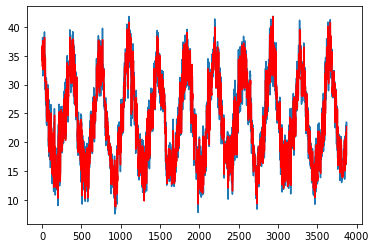

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                11382
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -25496.794
Date:                Sun, 06 Jun 2021   AIC                          51005.588
Time:                        19:43:52   BIC                          51049.626
Sample:                             0   HQIC                         51020.399
                              - 11382                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1633      0.009    -19.082      0.000      -0.180      -0.147
ar.L2         -0.2731      0.009    -31.258      0.000      -0.290      -0.256
ar.L3         -0.1867      0.009    -20.485      0.0

NameError: name 'DataFrame' is not defined

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = data.T2M_MAX
X = X.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
erreur = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
   
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
    erreur.append(abs(obs-yhat))
  



Test RMSE: 2.255


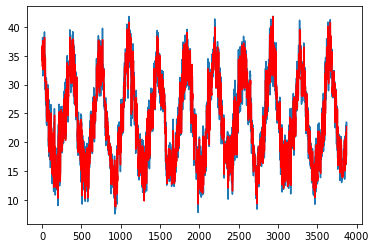

In [ ]:
  
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                11382
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -25496.794
Date:                Sun, 06 Jun 2021   AIC                          51005.588
Time:                        19:49:06   BIC                          51049.626
Sample:                             0   HQIC                         51020.399
                              - 11382                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1633      0.009    -19.082      0.000      -0.180      -0.147
ar.L2         -0.2731      0.009    -31.258      0.000      -0.290      -0.256
ar.L3         -0.1867      0.009    -20.485      0.0

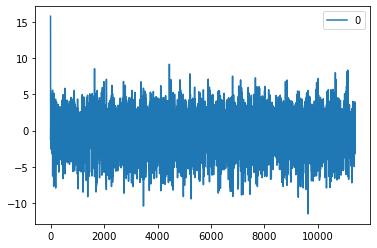

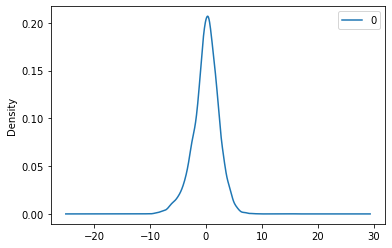

                  0
count  11382.000000
mean       0.002350
std        2.278343
min      -11.468921
25%       -1.246268
50%        0.152635
75%        1.443426
max       15.750000


In [ ]:
from pandas import DataFrame
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())


In [ ]:
# Import the folium library
import folium
# Build the default map for a specific location (Tunisie)
map = folium.Map(location=[float(data.LAT_x[0]),data.LON_x[0]],zoom_start=7)
#save in a file
map.save("index.html")

tooltip = "Click Here For More Info"
marker = folium.Marker(
    location=[float(data.LAT_x[0]),data.LON_x[0]],
    popup=yhat,
    tooltip=tooltip)
marker.add_to(map)
map

In [ ]:
m= model_fit.predict()
len(m)

In [ ]:
plt.plot(m)


In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import datetime

from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

# fit model
model = ARIMA(X, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
rmse

In [ ]:
results = model.evaluate(x_test, y_test, batch_size=32)

NameError: name 'model' is not defined